<a href="https://colab.research.google.com/github/ravivarmakumar/INFO-5505-Spring-2022/blob/main/RaviVarmaKumarBevara_INFO5505_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO-5505 Applied Machine Learning for Data Scientists


### Assignment 3 - Clustering


- Name: Ravi Varma Kumar Bevara
- Student ID : 11476678

**Unsupervised Learning**
<font color='red'>
> Unsupervised learning deals with problems in which data doesn't have labels. That property makes it very problematic for many applications as absence of labels representing thedesired behavior for your model means the absense of solid reference point to judge the quality of model.
<br />
</font>

* Clustering - It is a problem of learning to assign a label to examples by leveraging an unlabeled dataset. Because the dataset is completely unlabeled, deciding on whether the learned model is optimal ismuch more complicated thanin supervised learning. K-means clustering algorithm works in the following steps...
  * We will choose a arbitary k-value which represents the number of clusters.
  * Then, we randomly put k feature vectores, called "centroids".
  * Now, we will compute euclidean distance from each point to each centroid and assign the closest centroid to each example in training data.
  * Then, we calculate the average feature vectors to each set centroid, as they will become new locations of centroids.
  * We recompute the distances from each example to each centroid, update the centroids until the assignments don't change even after the centroids are recomputed.

#### Importing Libraries

#
<font color="blue">
As the python is the primary language I chose to execute this model, I tried to explore all the libraries related to exploratory data analysis. Numpy is the module we use for mathematical analysis related to dataset such as getting null values, changing the shape of input array to the model. Pandas being the best model for data manipulation, which is highly compactable with NumPy module. For supporting the data analysis, I choose the two popular libraries matplotlib, and seaborn for appropriate visualizations.
</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

For the dataset, I decided to save the data on the cloud which is google drive, It would be compactable with google cloab

####Mounting my google drive for the dataset access

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
traindata = pd.read_csv('drive/MyDrive/INFO5505-Spring2022/ALS_TrainingData_2223.csv')

In [4]:
testdata = pd.read_csv('drive/MyDrive/INFO5505-Spring2022/ALS_TestingData_78.csv')

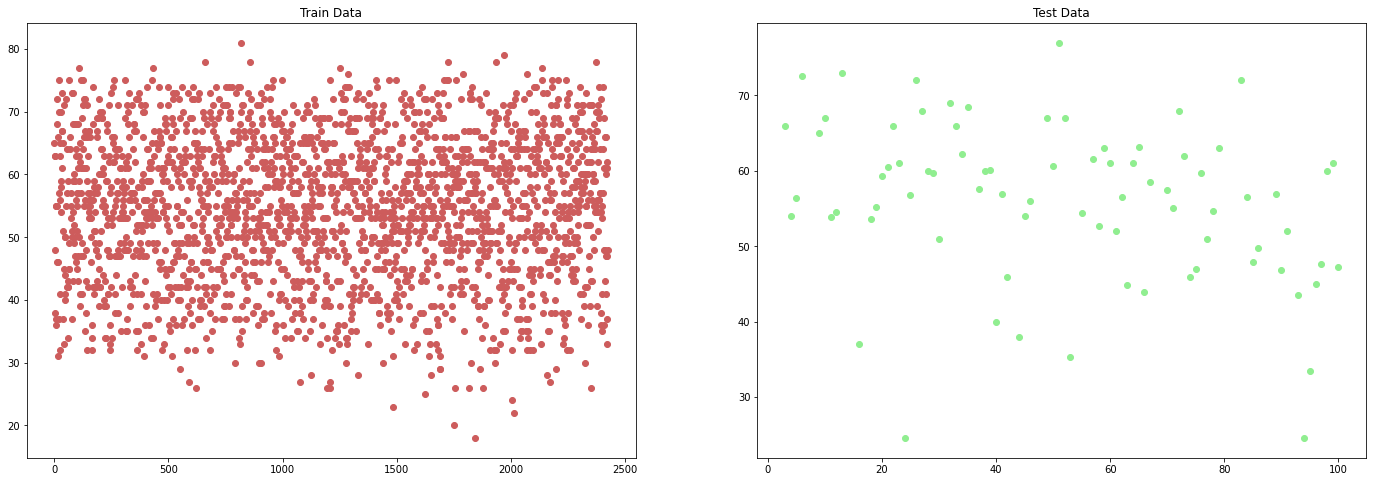

<Figure size 432x288 with 0 Axes>

In [5]:
fig, axes = plt.subplots(figsize=(24,8) ,nrows=1,ncols=2)


x = traindata.to_numpy()
plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],c='indianred')
plt.title("Train Data")

y = testdata.to_numpy()
plt.subplot(1,2,2)
plt.scatter(y[:,0],y[:,1],c='lightgreen')
plt.title("Test Data")

plt.show()
plt.tight_layout()

####Exploratory Data Analysis

<font color='seagreen'>

* It is exploring the data to better understand the data, like extraxting or transforming input variabeles.
* Indetifyiing outliers, missing values, and human errors in the data.
* Understanding the relation between each variable, alongside observing how each variables is distributed along thhe path of data provided.
</font>

In [6]:
traindata.head().T

,0,1,2,3,4
ID,1.000000,2.000000,3.000000,4.000000,5.000000
Age_mean,65.000000,48.000000,38.000000,63.000000,63.000000
Albumin_max,57.000000,45.000000,50.000000,47.000000,47.000000
Albumin_median,40.500000,41.000000,47.000000,44.000000,45.500000
Albumin_min,38.000000,39.000000,45.000000,41.000000,42.000000
...,...,...,...,...,...
trunk_min,7.000000,5.000000,0.000000,3.000000,1.000000
trunk_range,0.002646,0.005386,0.008929,0.004988,0.008489
Urine.Ph_max,6.000000,7.000000,6.000000,7.000000,6.000000
Urine.Ph_median,6.000000,5.000000,5.000000,6.000000,5.000000


In [7]:
testdata.head().T

,0,1,2,3,4
ID,3.000000,4.000000,5.000000,6.000000,9.000000
Age_mean,65.906849,54.000000,56.394521,72.619178,65.000000
Albumin_max,46.000000,39.000000,46.000000,50.000000,45.000000
Albumin_median,44.000000,36.000000,43.000000,42.500000,42.000000
Albumin_min,43.000000,33.000000,39.000000,41.000000,36.000000
...,...,...,...,...,...
Urine.Ph_range,0.004098,0.003275,0.003456,0.024194,0.002370
White.Blood.Cell..WBC._max,8.570000,8.040000,8.900000,12.380000,11.530000
White.Blood.Cell..WBC._median,7.680000,6.620000,7.160000,7.905000,9.290000
White.Blood.Cell..WBC._min,6.600000,4.970000,5.010000,4.960000,7.940000


#
<font color="red">
After, looking at the top observations in both test and train data, I decide to observe the statistical properties of the dataset.
</font>

In [8]:
traindata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2223.0,1214.874944,696.678300,1.0,614.500000,1213.00000,1815.500000,2424.000000
Age_mean,2223.0,54.550157,11.396546,18.0,47.000000,55.00000,63.000000,81.000000
Albumin_max,2223.0,47.011134,3.233980,37.0,45.000000,47.00000,49.000000,70.300000
Albumin_median,2223.0,43.952542,2.654804,34.5,42.000000,44.00000,46.000000,51.100000
Albumin_min,2223.0,40.766347,3.193087,24.0,39.000000,41.00000,43.000000,49.000000
...,...,...,...,...,...,...,...,...
trunk_min,2223.0,2.955915,2.358095,0.0,1.000000,3.00000,5.000000,8.000000
trunk_range,2223.0,0.007136,0.004503,0.0,0.003643,0.00692,0.009639,0.042017
Urine.Ph_max,2223.0,6.820450,0.932141,5.0,6.000000,7.00000,7.000000,9.000000
Urine.Ph_median,2223.0,5.710639,0.625039,5.0,5.000000,6.00000,6.000000,9.000000


#
<font color="red">
So, we can see that all the variables are not on same scale, this confirms that the data needs to be normalized before constructing a model.

In [9]:
testdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,78.0,51.589744,28.468910,3.000000,27.250000,51.500000,74.750000,100.000000
Age_mean,78.0,56.025571,10.514606,24.583562,51.000000,57.000000,62.180822,77.000000
Albumin_max,78.0,45.256410,3.056549,38.000000,43.000000,45.500000,47.000000,51.000000
Albumin_median,78.0,42.173077,3.083341,35.000000,40.000000,42.250000,44.000000,49.000000
Albumin_min,78.0,38.910256,3.977815,25.000000,36.250000,39.000000,41.000000,47.000000
...,...,...,...,...,...,...,...,...
Urine.Ph_range,78.0,0.004544,0.004776,0.000000,0.002278,0.003390,0.004715,0.034483
White.Blood.Cell..WBC._max,78.0,9.341795,2.939529,4.110000,7.767500,8.750000,10.690000,22.490000
White.Blood.Cell..WBC._median,78.0,6.789103,1.683264,3.240000,5.878750,6.720000,7.730000,11.795000
White.Blood.Cell..WBC._min,78.0,5.286026,1.513861,1.430000,4.330000,5.320000,6.125000,9.500000


#
<font color="red">
Similar to train data, tets data is also not on same scale, so this also needs to be standardized fore testing the models.

In [10]:
traindata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 101 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    ID                                int64  
 1    Age_mean                          int64  
 2    Albumin_max                       float64
 3    Albumin_median                    float64
 4    Albumin_min                       float64
 5    Albumin_range                     float64
 6    ALSFRS_slope                      float64
 7    ALSFRS_Total_max                  int64  
 8    ALSFRS_Total_median               float64
 9    ALSFRS_Total_min                  int64  
 10   ALSFRS_Total_range                float64
 11   ALT.SGPT._max                     float64
 12   ALT.SGPT._median                  float64
 13   ALT.SGPT._min                     float64
 14   ALT.SGPT._range                   float64
 15   AST.SGOT._max                     int64  
 16   AST.SGOT._median      

In [11]:
testdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 131 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    ID                                int64  
 1    Age_mean                          float64
 2    Albumin_max                       float64
 3    Albumin_median                    float64
 4    Albumin_min                       int64  
 5    Albumin_range                     float64
 6    ALSFRS_slope                      float64
 7    ALSFRS_Total_max                  int64  
 8    ALSFRS_Total_median               float64
 9    ALSFRS_Total_min                  int64  
 10   ALSFRS_Total_range                float64
 11   ALT.SGPT._max                     int64  
 12   ALT.SGPT._median                  float64
 13   ALT.SGPT._min                     int64  
 14   ALT.SGPT._range                   float64
 15   AST.SGOT._max                     int64  
 16   AST.SGOT._median          

In [12]:
traindata.shape

(2223, 101)

In [13]:
testdata.shape

(78, 131)

#
<font color="blue">
For dealing with null values, I choose to aggreagte them, and sort the obervations in the dataset. If all the values are zero, then it would be appear so there are no null values in the data.
</font>

In [14]:
traindata.isnull().sum(axis=0).sort_values(ascending=False)

ID                     0
leg_max                0
Platelets_max          0
onset_site_mean        0
onset_delta_mean       0
                      ..
bp_systolic_max        0
bp_diastolic_range     0
bp_diastolic_min       0
bp_diastolic_median    0
Urine.Ph_min           0
Length: 101, dtype: int64

In [15]:
testdata.isnull().sum(axis=0).sort_values(ascending=False)

ID                              0
Potassium_max                   0
Platelets_median                0
Platelets_max                   0
onset_site_mean                 0
                               ..
bp_diastolic_min                0
bp_diastolic_median             0
bp_diastolic_max                0
BMI_max                         0
White.Blood.Cell..WBC._range    0
Length: 131, dtype: int64

#
<font color="red">
From the columns, I could see that Id and Subject ID are no use to this analysis as we will be acquring patient phenotypes irrespective of clinical trail and patient demographics.

In [16]:
traindata.columns

Index(['ID', 'Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min',
       'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max',
       'ALSFRS_Total_median', 'ALSFRS_Total_min',
       ...
       'Sodium_min', 'Sodium_range', 'SubjectID', 'trunk_max', 'trunk_median',
       'trunk_min', 'trunk_range', 'Urine.Ph_max', 'Urine.Ph_median',
       'Urine.Ph_min'],
      dtype='object', length=101)

In [17]:
traindata[['ID','SubjectID']].dtypes

ID           int64
SubjectID    int64
dtype: object

In [18]:
traindata[['ID','SubjectID']]

,ID,SubjectID
0,1,533
1,2,649
2,3,1234
3,4,2492
4,5,2956
...,...,...
2218,2419,997136
2219,2420,998047
2220,2421,998773
2221,2422,998908


#
<font color="red">
From the results, I decided to remove the attributes.

In [19]:
traindata.drop(['ID', 'SubjectID'], axis=1, inplace=True)

In [20]:
testdata.columns

Index(['ID', 'Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min',
       'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max',
       'ALSFRS_Total_median', 'ALSFRS_Total_min',
       ...
       'trunk_min', 'trunk_range', 'Urine.Ph_max', 'Urine.Ph_median',
       'Urine.Ph_min', 'Urine.Ph_range', 'White.Blood.Cell..WBC._max',
       'White.Blood.Cell..WBC._median', 'White.Blood.Cell..WBC._min',
       'White.Blood.Cell..WBC._range'],
      dtype='object', length=131)

In [21]:
testdata[['ID','SubjectID']].dtypes

ID           int64
SubjectID    int64
dtype: object

In [22]:
testdata[['ID','SubjectID']]

,ID,SubjectID
0,3,55888
1,4,61505
2,5,63255
3,6,70641
4,9,108342
...,...,...
73,96,921629
74,97,943781
75,98,945153
76,99,957124


In [23]:
testdata.drop(['ID','SubjectID'], axis=1, inplace=True)

In [24]:
traindata.shape

(2223, 99)

In [25]:
testdata.shape

(78, 129)

####Correlation Matrix

#
<font color="red">
For exploring how the attributes of dataset are behaving among themselves, with each other attributes, I used correaltion matrix concept from statistics which will result me all the correaltion coefficients. In detail, it is a table which shows the correaltion between varibales.
</font>

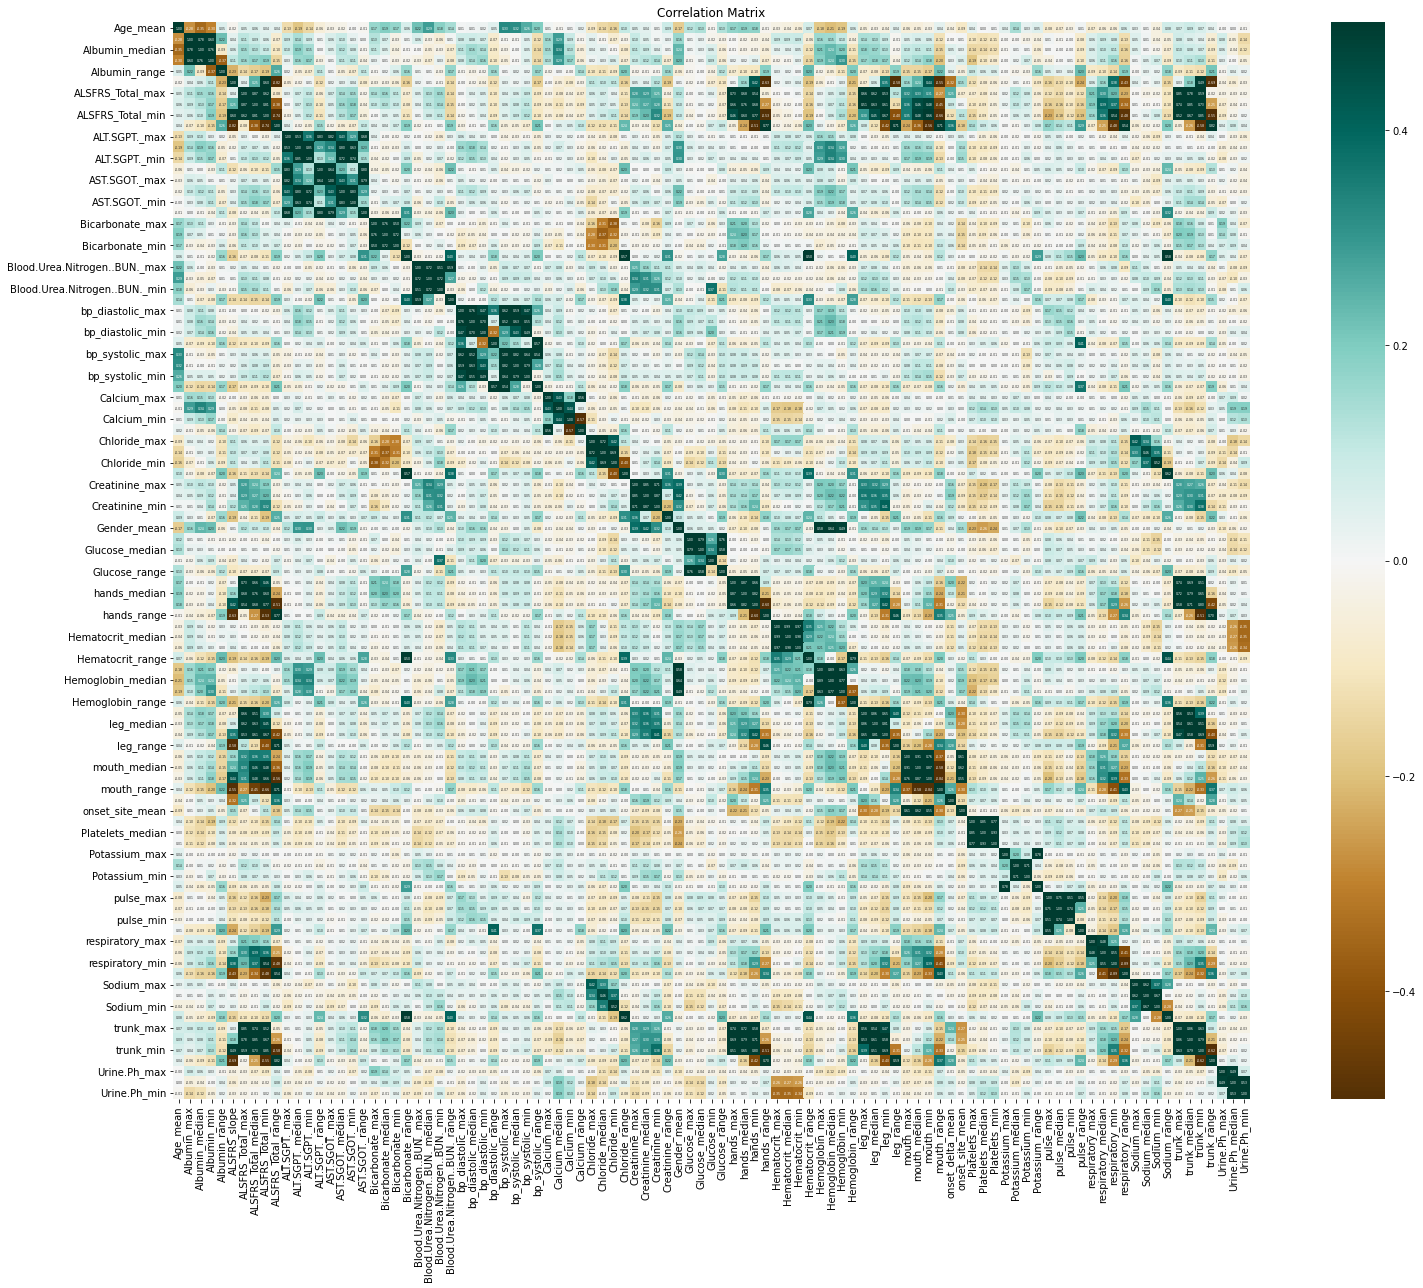

In [26]:
fig, ax = plt.subplots(figsize=(24, 18))

corr = traindata.iloc[:, 1:].corr()
heatmap = sns.heatmap(traindata.corr(), cbar=True, vmin=-0.5, vmax=0.5, fmt='.2f', annot_kws={'size': 3}, annot=True, square=True, cmap='BrBG')
ax.set_title('Correlation Matrix')
plt.tight_layout()

####Exploring patterns or trends in the independent variables

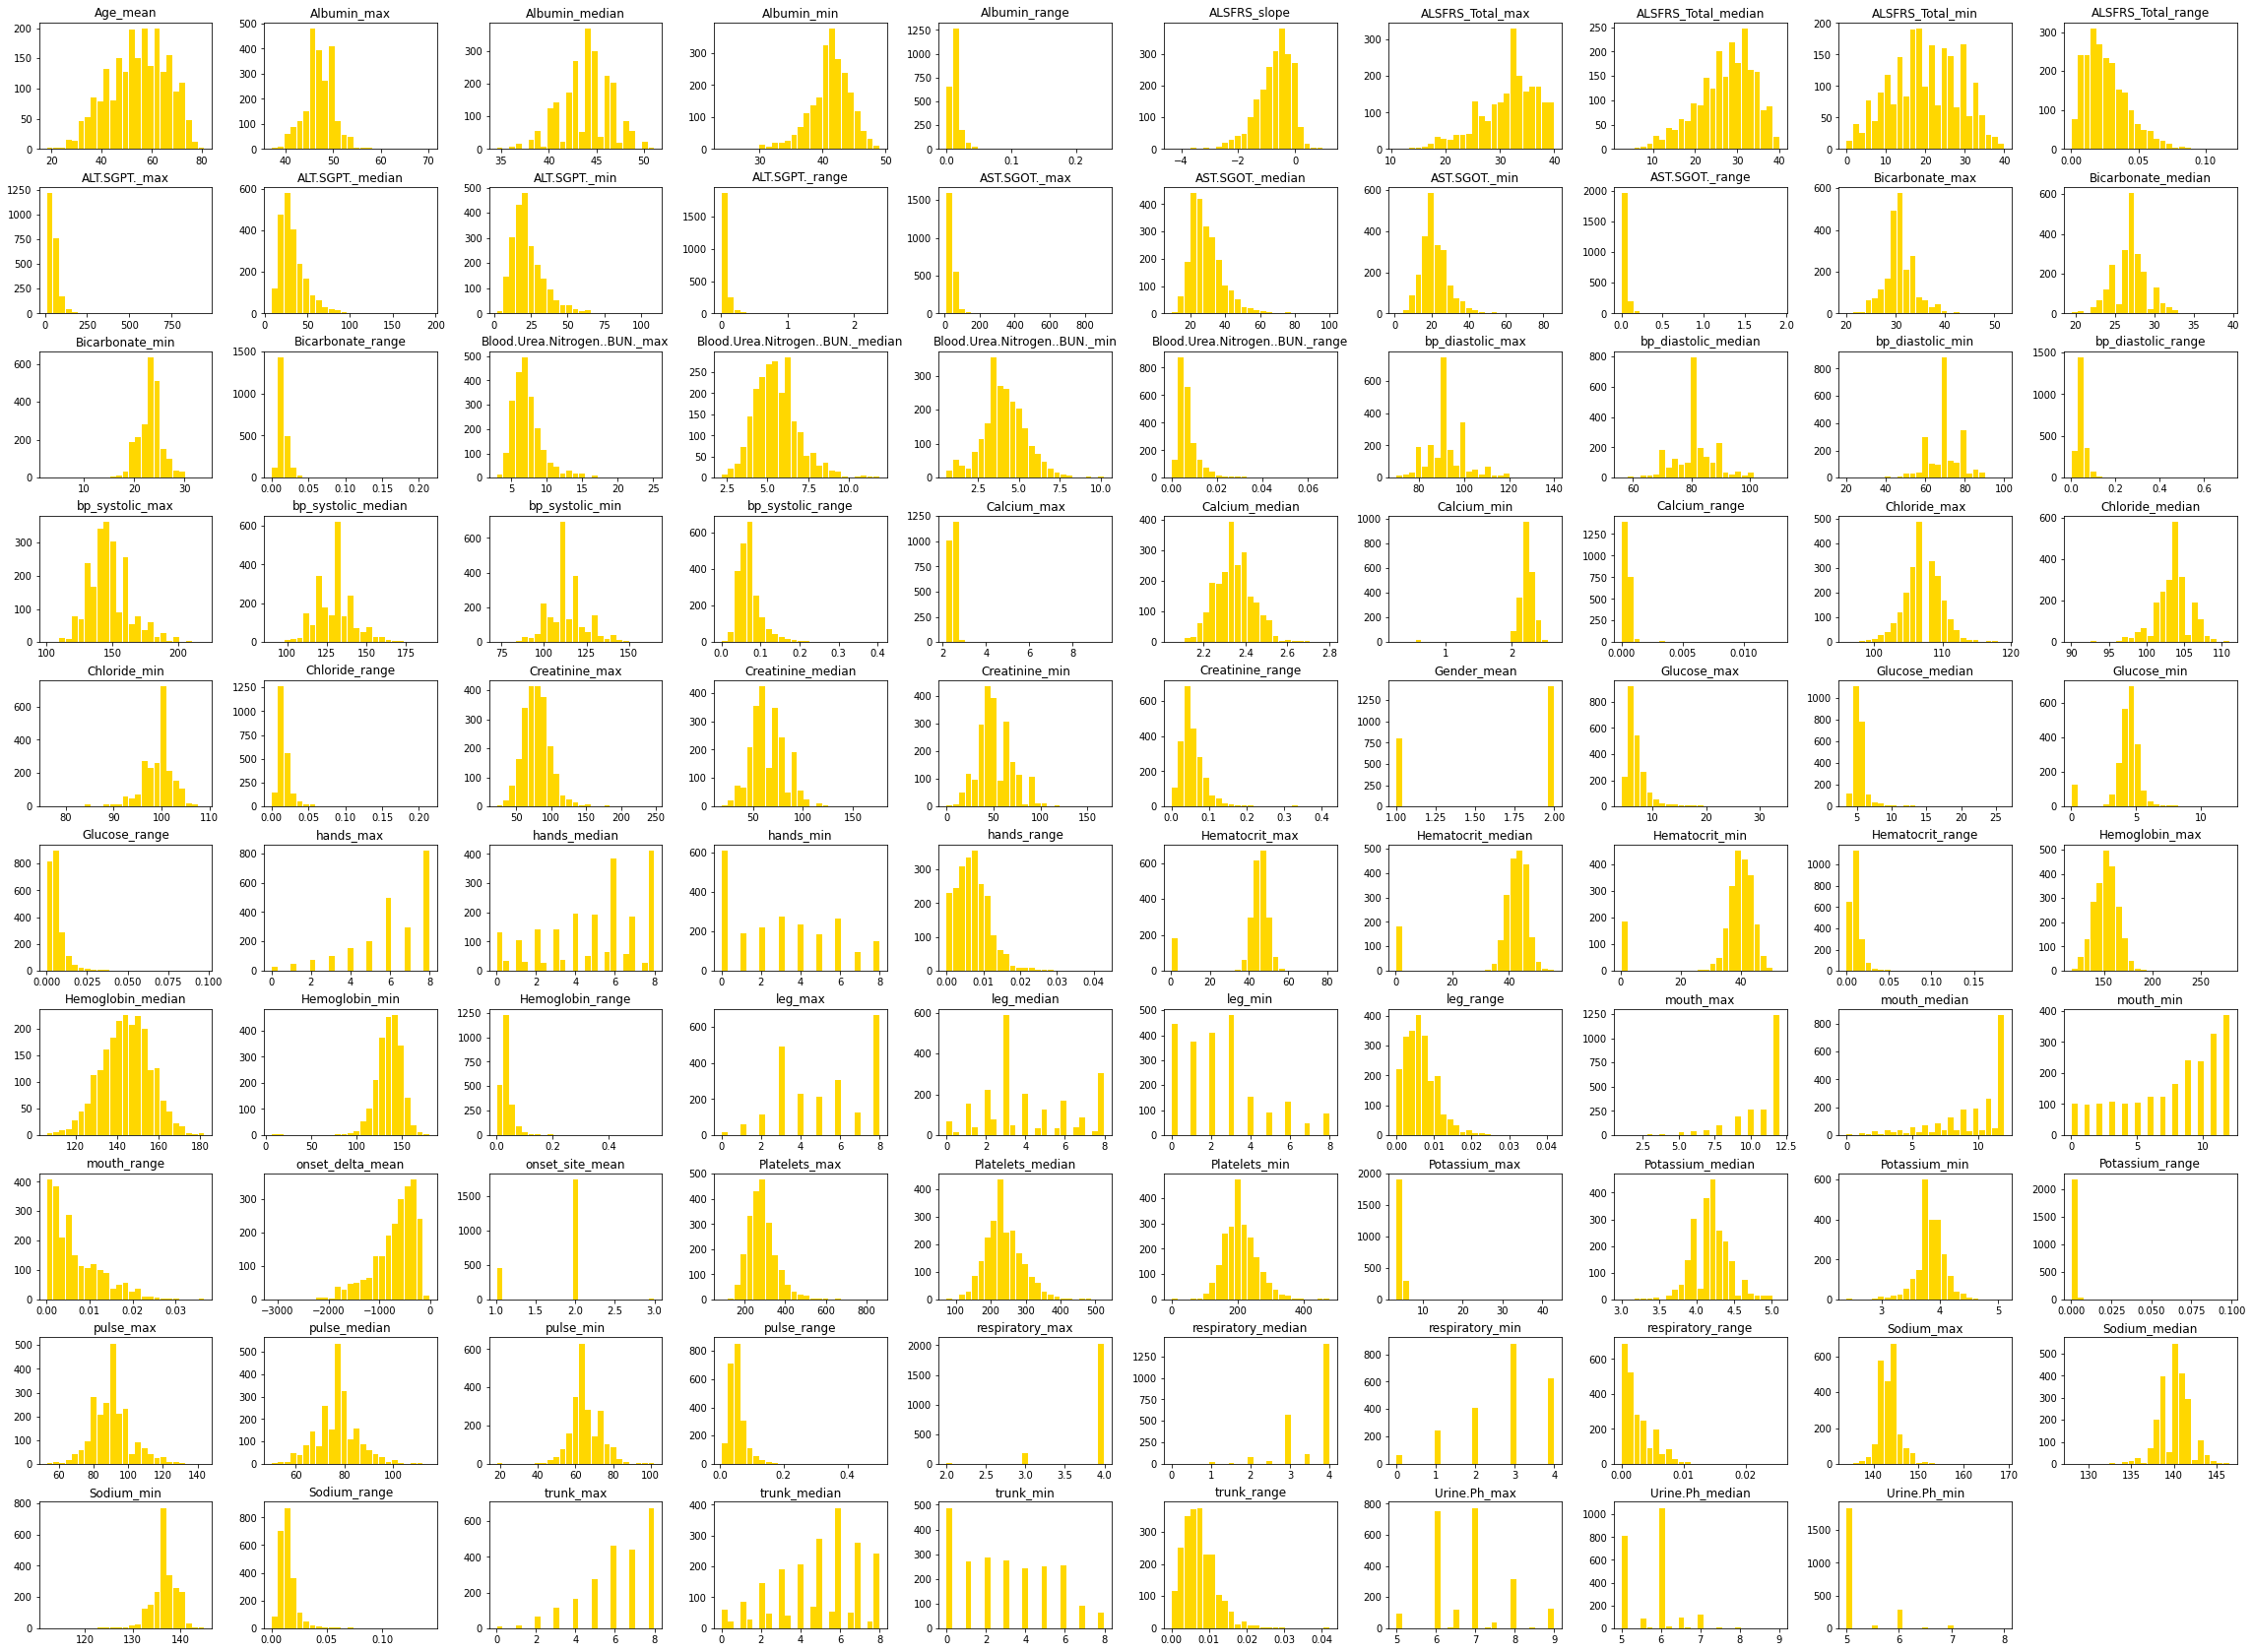

In [27]:
distributiontraindata = traindata.hist(figsize=(40,30),bins=25, grid=False, zorder=2, rwidth = 0.9, color="gold")

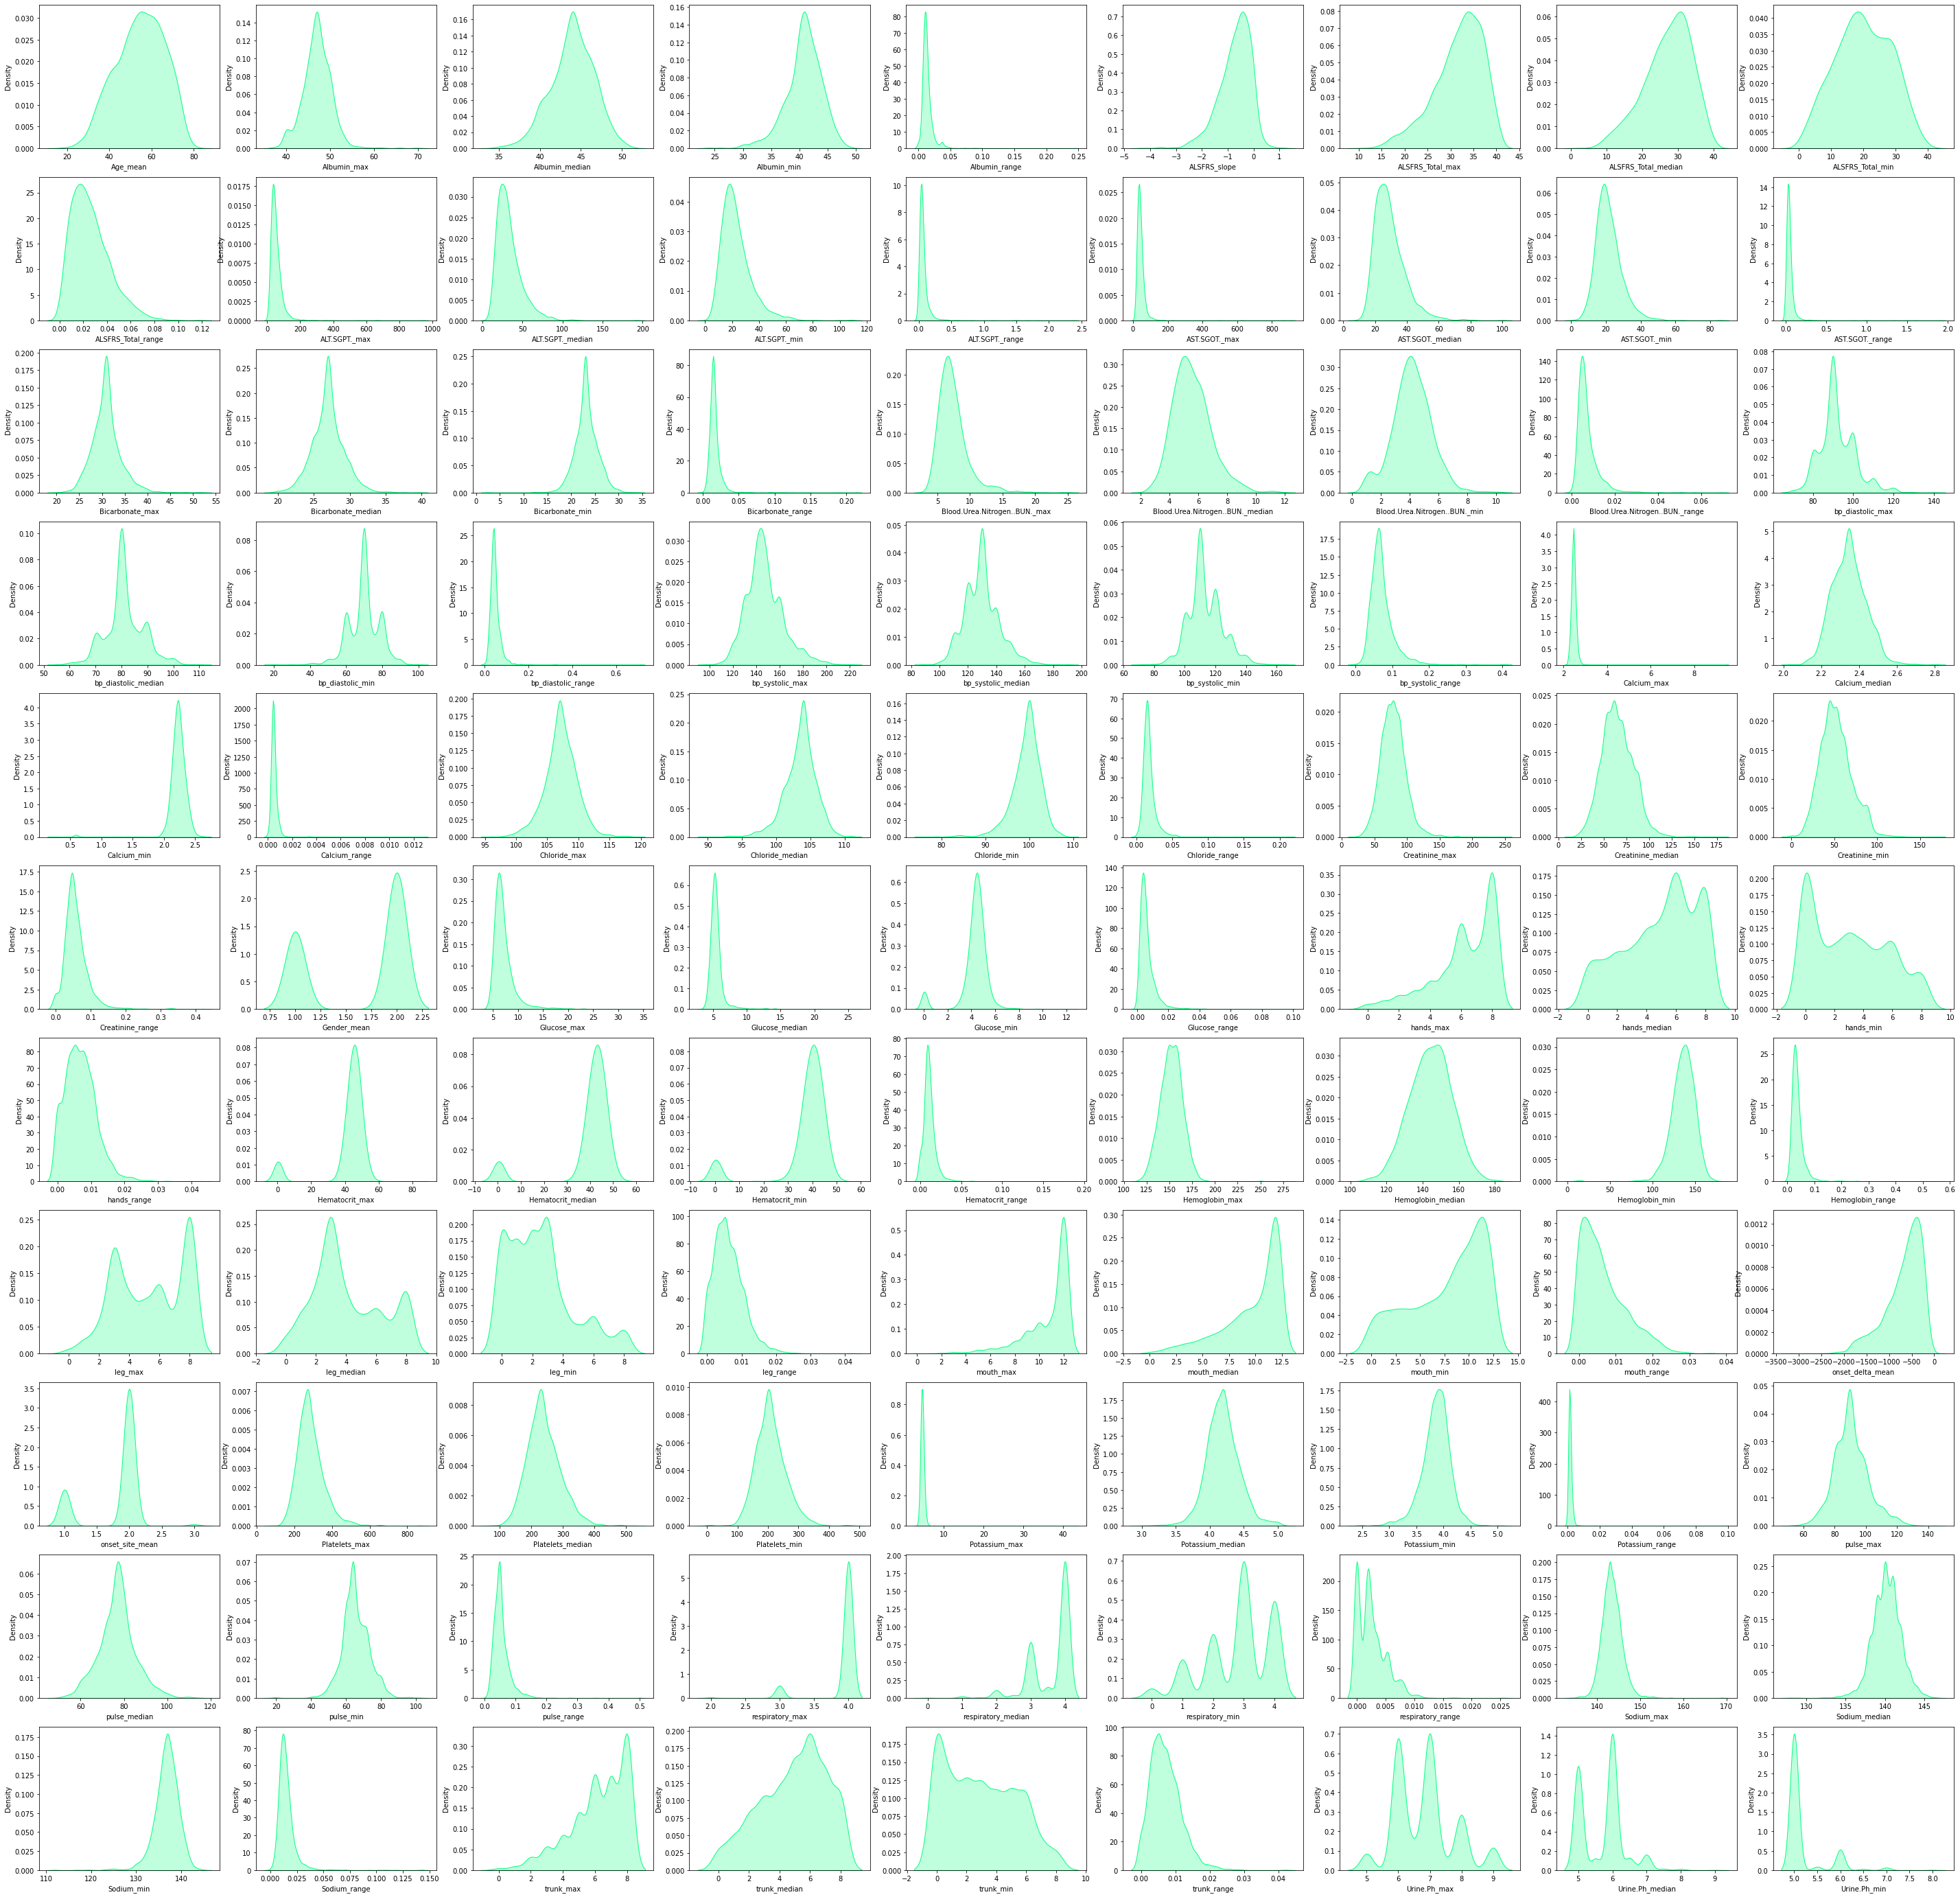

In [28]:
rows = 11
columns = 9
fig, axes = plt.subplots(figsize=(50,50) ,nrows=rows,ncols=columns)

for i,column in enumerate(traindata.columns):
  sns.kdeplot(data=traindata[column], ax=axes[i//columns,i%columns], color='springgreen', shade=True)

#### Optimal K-value for training the model

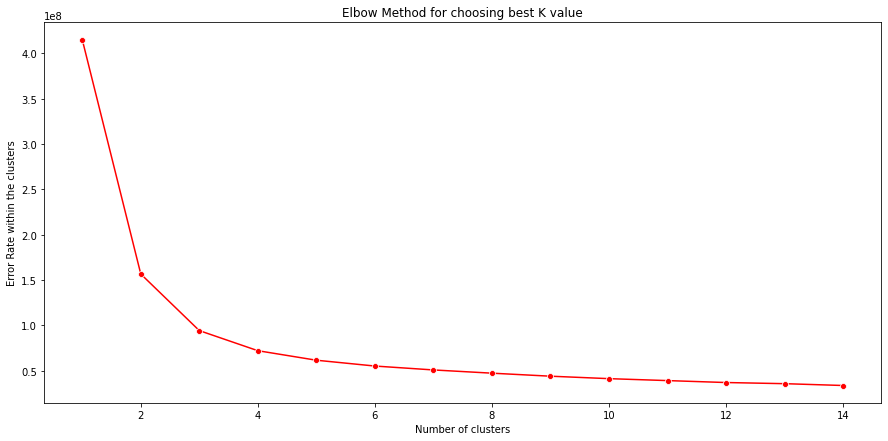

In [29]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(traindata)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,7))
sns.lineplot(x=range(1, 15), y=wcss, marker='o', color='red')
plt.title('Elbow Method for choosing best K value')
plt.xlabel('Number of clusters')
plt.ylabel('Error Rate within the clusters')
plt.show()

#### Feature Importance

In [30]:
X = traindata.copy().drop('ALSFRS_slope',axis=1)
y = traindata['ALSFRS_slope']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.13478873756947793

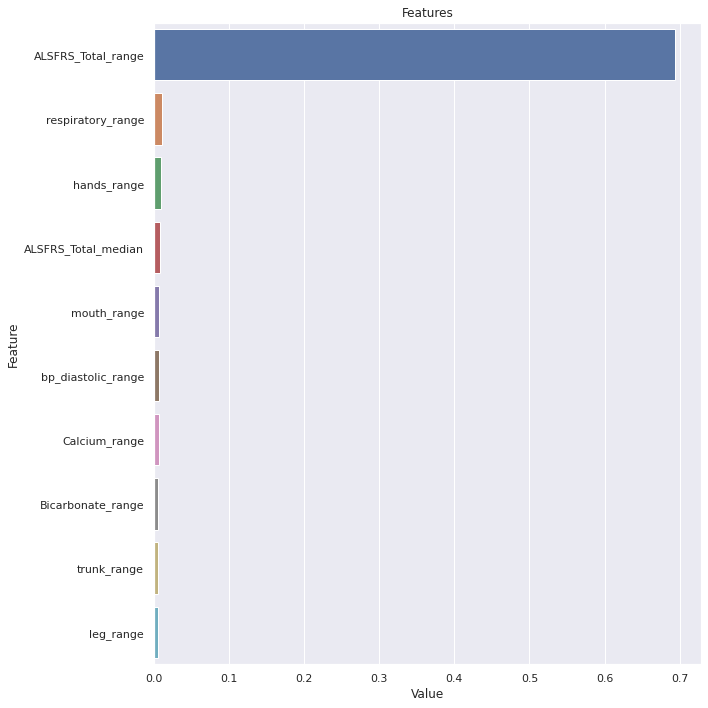

In [33]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

plot_importance(rf_model, X, 10)

#### Scaling the data and Normalization using Z-score 

In [34]:
from sklearn.preprocessing import StandardScaler, normalize

sc = StandardScaler()
x_scale = sc.fit_transform(traindata)
x_norm = normalize(traindata)

#### Principal Component Analysis

In [35]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_norm)

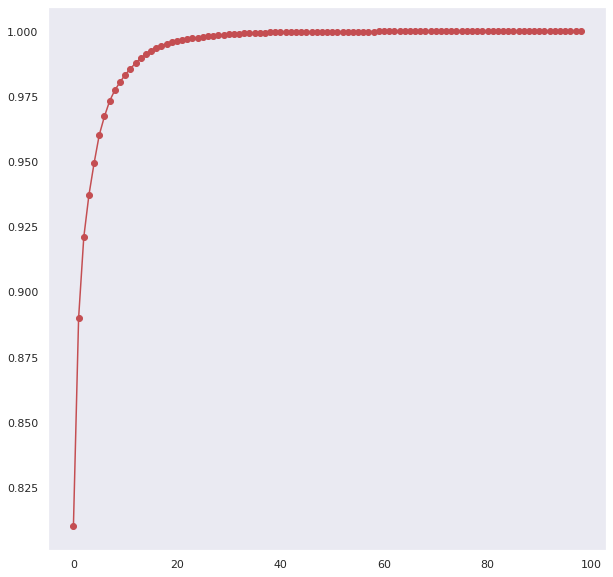

In [36]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [37]:
pca_new = PCA(n_components=20)
x_new = pca_new.fit_transform(x_pca)

#### Applying the same standardization and applying pca to test data

In [38]:
t_scale = sc.fit_transform(testdata)
t_norm = normalize(t_scale)
t_pca = pca.fit_transform(t_norm)
t_new = pca_new.fit_transform(t_pca)

#### Model Training and Evaluation

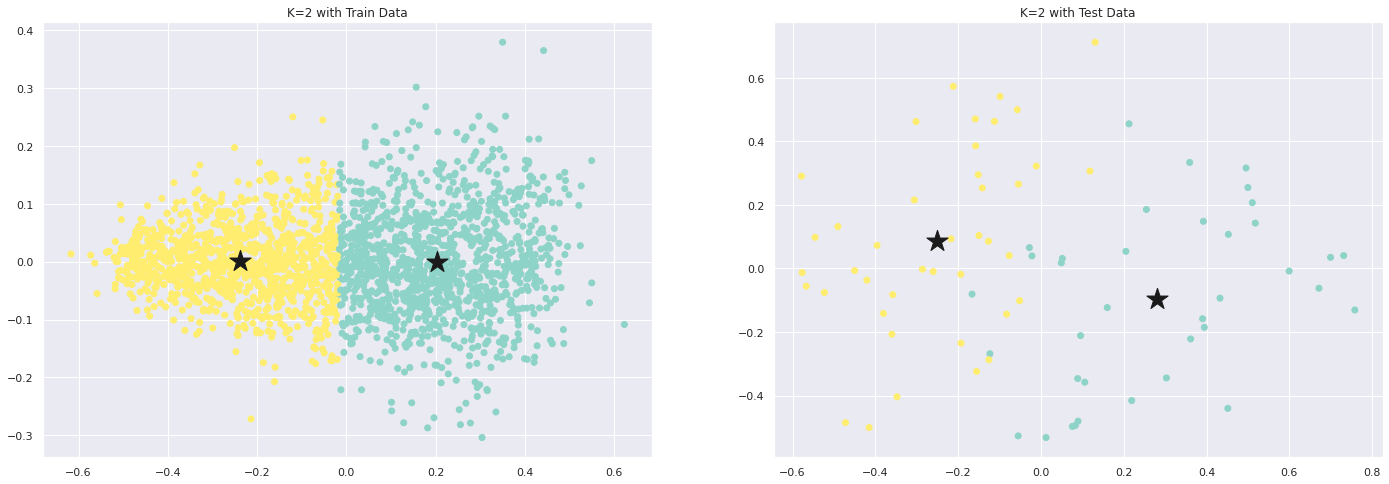

In [39]:
fig, axes = plt.subplots(figsize=(24,8) ,nrows=1,ncols=2)

model1 = KMeans(n_clusters=2)
model1.fit(x_new)
predicted1 = model1.fit_predict(x_new)
plt.subplot(1,2,1)
plt.scatter(x_new[:,0],x_new[:,1], c=predicted1, cmap='Set3')
centers = model1.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],color='k',marker='*',s=500)
plt.title('K=2 with Train Data')


testmodel1 = KMeans(n_clusters=2)
testmodel1.fit(t_new)
testpredicted1 = testmodel1.fit_predict(t_new)
plt.subplot(1,2,2)
plt.scatter(t_new[:,0],t_new[:,1], c=testpredicted1, cmap='Set3')
testcenters = testmodel1.cluster_centers_
plt.scatter(testcenters[:,0],testcenters[:,1],color='k',marker='*',s=500)
plt.title('K=2 with Test Data')

plt.show()

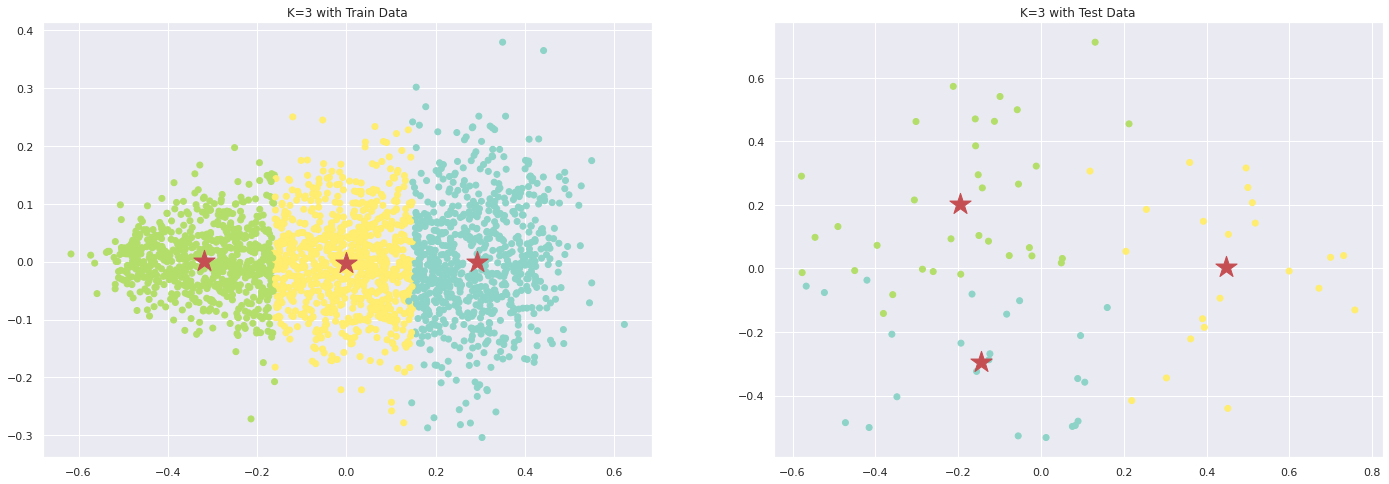

In [40]:
fig, axes = plt.subplots(figsize=(24,8) ,nrows=1,ncols=2)

model2 = KMeans(n_clusters=3)
model2.fit(x_new)
predicted2 = model2.fit_predict(x_new)
plt.subplot(1,2,1)
plt.scatter(x_new[:,0],x_new[:,1], c=predicted2, cmap='Set3')
centers2 = model2.cluster_centers_
plt.scatter(centers2[:,0],centers2[:,1],color='r',marker='*',s=500)
plt.title('K=3 with Train Data')


testmodel2 = KMeans(n_clusters=3)
testmodel2.fit(t_new)
testpredicted2 = testmodel2.fit_predict(t_new)
plt.subplot(1,2,2)
plt.scatter(t_new[:,0],t_new[:,1], c=testpredicted2, cmap='Set3')
testcenters2 = testmodel2.cluster_centers_
plt.scatter(testcenters2[:,0],testcenters2[:,1],color='r',marker='*',s=500)
plt.title('K=3 with Test Data')

plt.show()

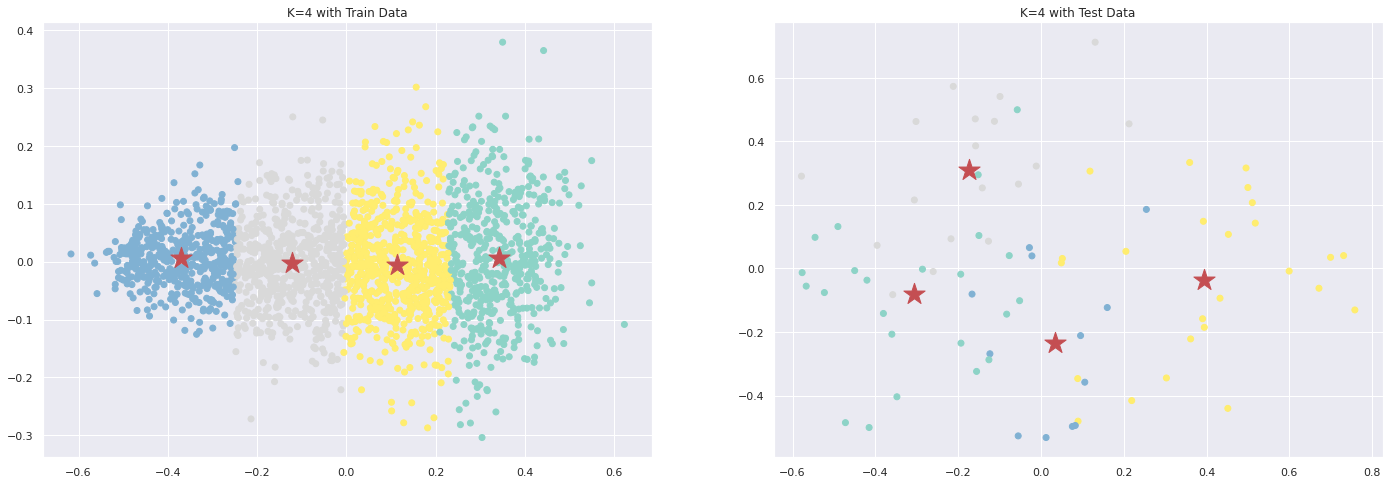

In [41]:
fig, axes = plt.subplots(figsize=(24,8) ,nrows=1,ncols=2)

model3 = KMeans(n_clusters=4)
model3.fit(x_new)
predicted3 = model3.fit_predict(x_new)
plt.subplot(1,2,1)
plt.scatter(x_new[:,0],x_new[:,1], c=predicted3, cmap='Set3')
centers3 = model3.cluster_centers_
plt.scatter(centers3[:,0],centers3[:,1],color='r',marker='*',s=500)
plt.title('K=4 with Train Data')


testmodel3 = KMeans(n_clusters=4)
testmodel3.fit(t_new)
testpredicted3 = testmodel3.fit_predict(t_new)
plt.subplot(1,2,2)
plt.scatter(t_new[:,0],t_new[:,1], c=testpredicted3, cmap='Set3')
testcenters3 = testmodel3.cluster_centers_
plt.scatter(testcenters3[:,0],testcenters3[:,1],color='r',marker='*',s=500)
plt.title('K=4 with Test Data')

plt.show()

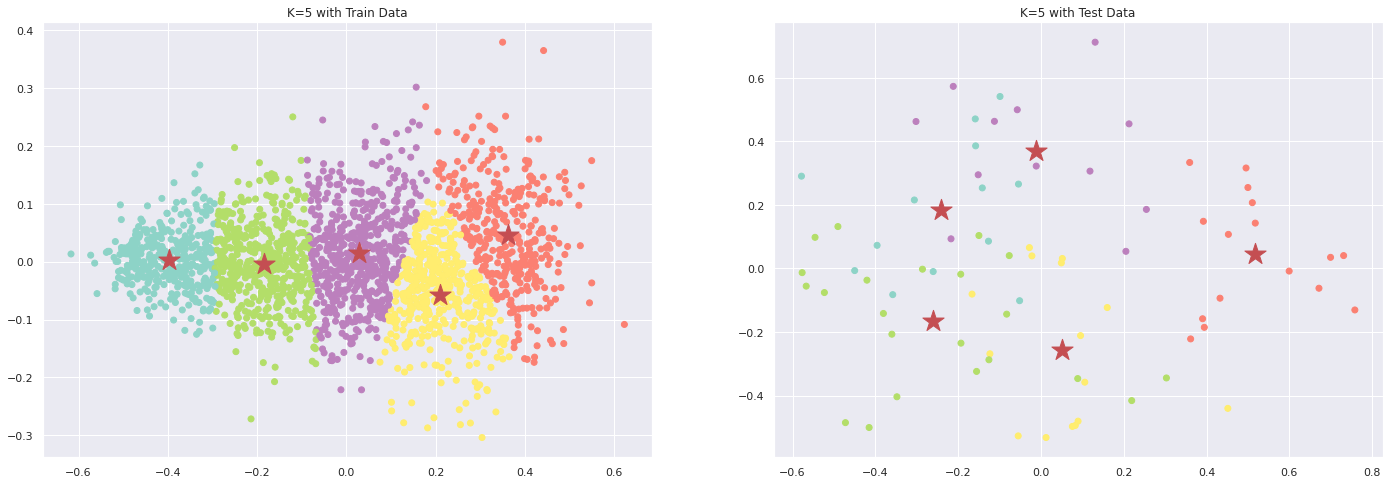

In [42]:
fig, axes = plt.subplots(figsize=(24,8) ,nrows=1,ncols=2)

model4 = KMeans(n_clusters=5)
model4.fit(x_new)
predicted4 = model4.fit_predict(x_new)
plt.subplot(1,2,1)
plt.scatter(x_new[:,0],x_new[:,1], c=predicted4, cmap='Set3')
centers4 = model4.cluster_centers_
plt.scatter(centers4[:,0],centers4[:,1],color='r',marker='*',s=500)
plt.title('K=5 with Train Data')


testmodel4 = KMeans(n_clusters=5)
testmodel4.fit(t_new)
testpredicted4 = testmodel4.fit_predict(t_new)
plt.subplot(1,2,2)
plt.scatter(t_new[:,0],t_new[:,1], c=testpredicted4, cmap='Set3')
testcenters4 = testmodel4.cluster_centers_
plt.scatter(testcenters4[:,0],testcenters4[:,1],color='r',marker='*',s=500)
plt.title('K=5 with Test Data')

plt.show()

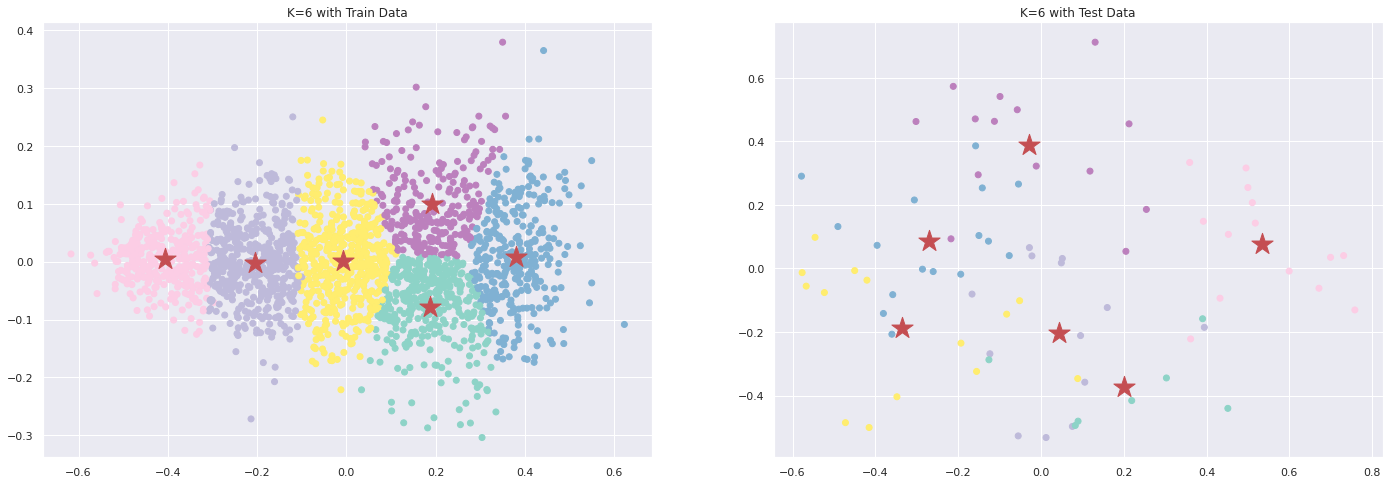

In [43]:
fig, axes = plt.subplots(figsize=(24,8) ,nrows=1,ncols=2)

model5 = KMeans(n_clusters=6)
model5.fit(x_new)
predicted5 = model5.fit_predict(x_new)
plt.subplot(1,2,1)
plt.scatter(x_new[:,0],x_new[:,1], c=predicted5, cmap='Set3')
centers5 = model5.cluster_centers_
plt.scatter(centers5[:,0],centers5[:,1],color='r',marker='*',s=500)
plt.title('K=6 with Train Data')


testmodel5 = KMeans(n_clusters=6)
testmodel5.fit(t_new)
testpredicted5 = testmodel5.fit_predict(t_new)
plt.subplot(1,2,2)
plt.scatter(t_new[:,0],t_new[:,1], c=testpredicted5, cmap='Set3')
testcenters5 = testmodel5.cluster_centers_
plt.scatter(testcenters5[:,0],testcenters5[:,1],color='r',marker='*',s=500)
plt.title('K=6 with Test Data')

plt.show()

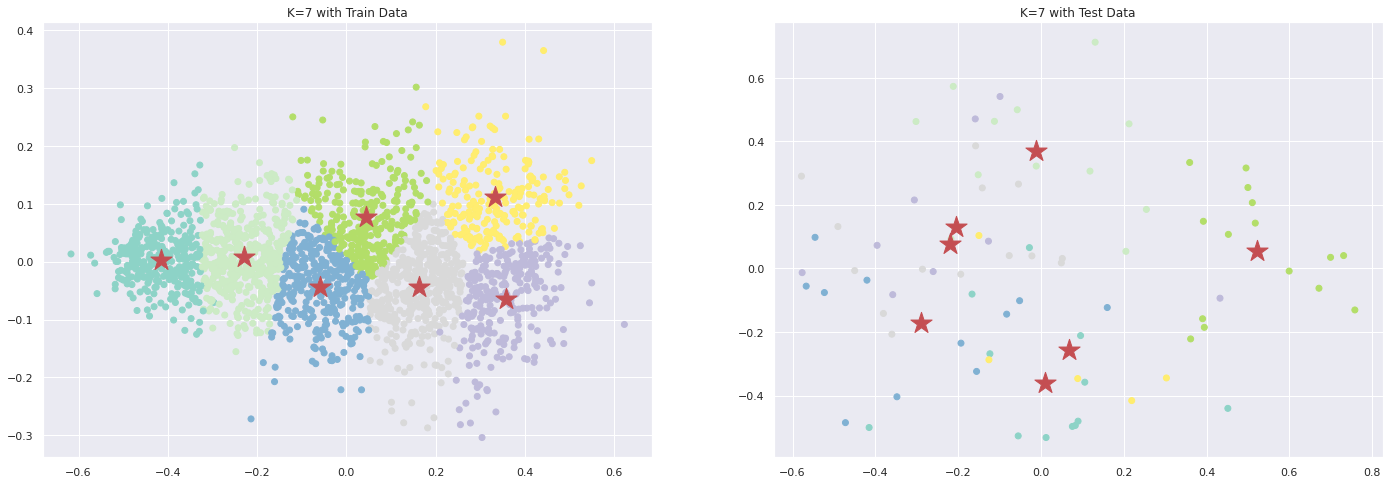

In [44]:
fig, axes = plt.subplots(figsize=(24,8) ,nrows=1,ncols=2)

model6 = KMeans(n_clusters=7)
model6.fit(x_new)
predicted6 = model6.fit_predict(x_new)
plt.subplot(1,2,1)
plt.scatter(x_new[:,0],x_new[:,1], c=predicted6, cmap='Set3')
centers6 = model6.cluster_centers_
plt.scatter(centers6[:,0],centers6[:,1],color='r',marker='*',s=500)
plt.title('K=7 with Train Data')


testmodel6 = KMeans(n_clusters=7)
testmodel6.fit(t_new)
testpredicted6 = testmodel6.fit_predict(t_new)
plt.subplot(1,2,2)
plt.scatter(t_new[:,0],t_new[:,1], c=testpredicted6, cmap='Set3')
testcenters6 = testmodel6.cluster_centers_
plt.scatter(testcenters6[:,0],testcenters6[:,1],color='r',marker='*',s=500)
plt.title('K=7 with Test Data')

plt.show()

#### Model Evaluation using Silhoutte scoring methodology

In [45]:
from sklearn.metrics import silhouette_score

print('Silhoutte score of model with k=2 and traindata is ' + str(silhouette_score(x_new, model1.labels_)))
print('Silhoutte score of model with k=3 and traindata is ' + str(silhouette_score(x_new, model2.labels_)))
print('Silhoutte score of model with k=4 and traindata is ' + str(silhouette_score(x_new, model3.labels_)))
print('Silhoutte score of model with k=5 and traindata is ' + str(silhouette_score(x_new, model4.labels_)))
print('Silhoutte score of model with k=6 and traindata is ' + str(silhouette_score(x_new, model5.labels_)))
print('Silhoutte score of model with k=7 and traindata is ' + str(silhouette_score(x_new, model6.labels_)))

Silhoutte score of model with k=2 and traindata is 0.46764907769306907
Silhoutte score of model with k=3 and traindata is 0.3662282211730987
Silhoutte score of model with k=4 and traindata is 0.3043809523035884
Silhoutte score of model with k=5 and traindata is 0.2650471306222563
Silhoutte score of model with k=6 and traindata is 0.2575112221613611
Silhoutte score of model with k=7 and traindata is 0.23671564027695477


In [46]:
print('Silhoutte score of model with k=2 and testdata is ' + str(silhouette_score(t_new, testmodel1.labels_)))
print('Silhoutte score of model with k=3 and testdata is ' + str(silhouette_score(t_new, testmodel2.labels_)))
print('Silhoutte score of model with k=4 and testdata is ' + str(silhouette_score(t_new, testmodel3.labels_)))
print('Silhoutte score of model with k=5 and testdata is ' + str(silhouette_score(t_new, testmodel4.labels_)))
print('Silhoutte score of model with k=6 and testdata is ' + str(silhouette_score(t_new, testmodel5.labels_)))
print('Silhoutte score of model with k=7 and testdata is ' + str(silhouette_score(t_new, testmodel6.labels_)))

Silhoutte score of model with k=2 and testdata is 0.09482077985718593
Silhoutte score of model with k=3 and testdata is 0.08611490362194824
Silhoutte score of model with k=4 and testdata is 0.08665032250502915
Silhoutte score of model with k=5 and testdata is 0.09261492787048407
Silhoutte score of model with k=6 and testdata is 0.08785281831762896
Silhoutte score of model with k=7 and testdata is 0.09605691209770362


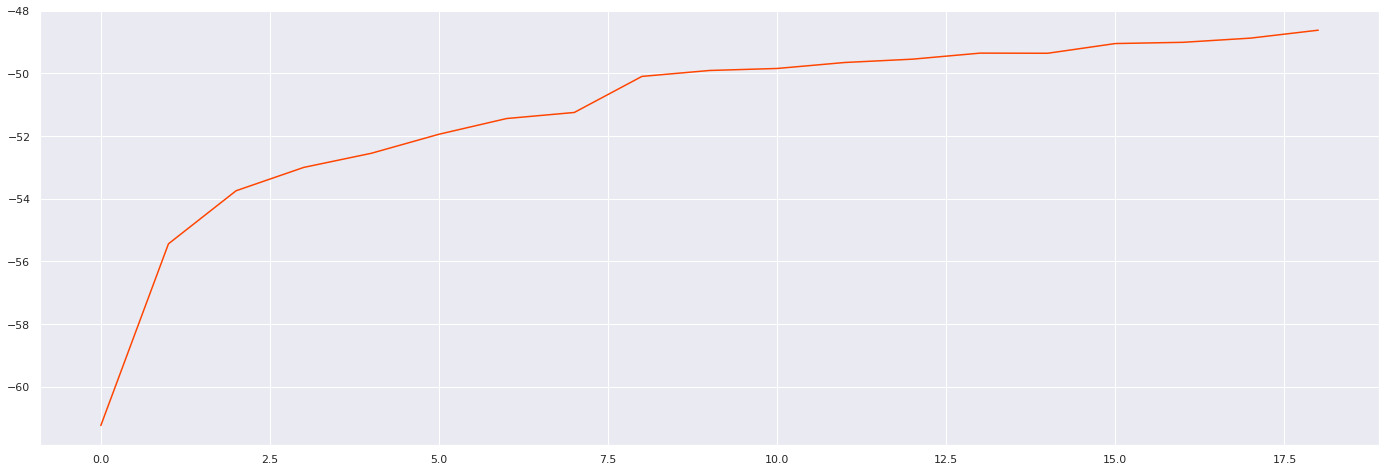

<Figure size 432x288 with 0 Axes>

In [47]:
fig, axes = plt.subplots(figsize=(24,8))

scores = []

for i in range(1,20):
  m = KMeans(n_clusters=i)
  m.fit(x_new)
  scores.append(m.score(t_new))

plt.plot(scores,c='orangered')
plt.show()
plt.tight_layout()

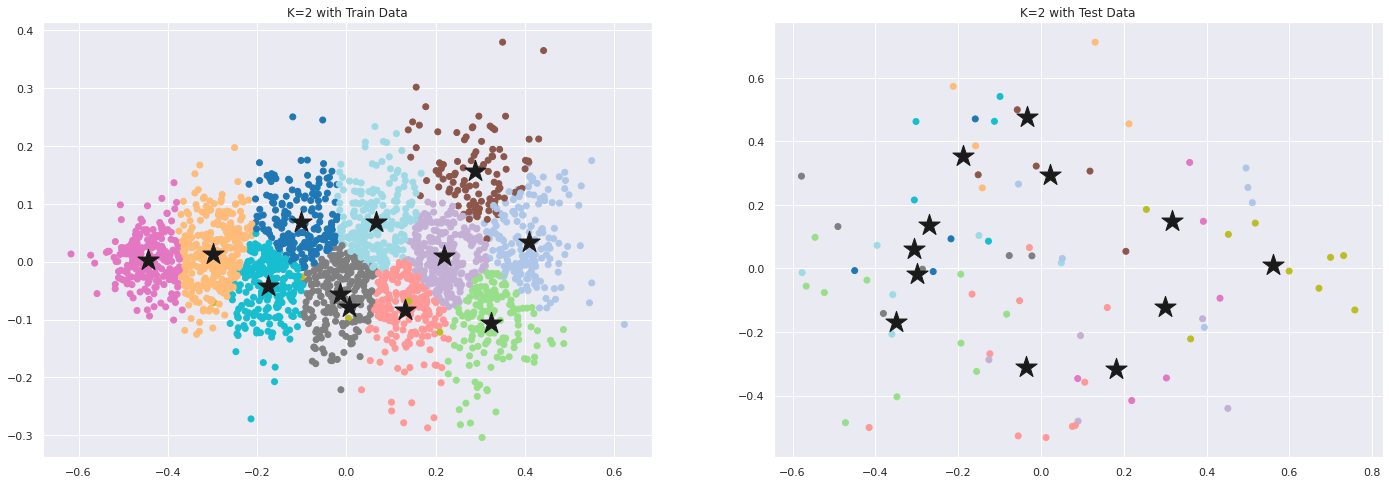

In [48]:
fig, axes = plt.subplots(figsize=(24,8) ,nrows=1,ncols=2)

finalmodel = KMeans(n_clusters=12)
finalmodel.fit(x_new)
finalpredicted = finalmodel.fit_predict(x_new)
plt.subplot(1,2,1)
plt.scatter(x_new[:,0],x_new[:,1], c=finalpredicted, cmap='tab20')
finalcenters = finalmodel.cluster_centers_
plt.scatter(finalcenters[:,0],finalcenters[:,1],color='k',marker='*',s=500)
plt.title('K=2 with Train Data')


finaltestmodel = KMeans(n_clusters=12)
finaltestmodel.fit(t_new)
finaltestpredicted = finaltestmodel.fit_predict(t_new)
plt.subplot(1,2,2)
plt.scatter(t_new[:,0],t_new[:,1], c=finaltestpredicted, cmap='tab20')
finaltestcenters = finaltestmodel.cluster_centers_
plt.scatter(finaltestcenters[:,0],finaltestcenters[:,1],color='k',marker='*',s=500)
plt.title('K=2 with Test Data')

plt.show()